In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql

%matplotlib inline

In [3]:
police_2013 = pd.read_csv('../data/call_2013.csv')

In [4]:
police_2013.shape

(1211710, 19)

In [5]:
police_2013.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201300000001,01/01/2013 12:00:00 AM,20130000003,C,15,Community Policing Activity,P,PROGRESS,15,COMMUNITY POLICING,0,11TH AV N / CHARLOTTE AV,410C,C,11.0,4205,36.162,-86.791,"(36.162, -86.791)"
1,PD201300000004,01/01/2013 12:01:00 AM,20130000005,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,0,HOPEDALE DR / HAYWOOD LN,333C,S,33.0,8711,36.069,-86.716,"(36.069, -86.716)"
2,PD201300000005,01/01/2013 12:01:00 AM,20130000008,C,83,Shots Fired,P,PROGRESS,6,ASSISTED OTHER UNIT,0,10TH AV N / CHEATHAM PL,415C,C,15.0,4327,36.176,-86.797,"(36.176, -86.797)"
3,PD201300000007,01/01/2013 12:02:00 AM,0,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,0,OLDHAM ST / COWAN ST,415C,C,13.0,1989,36.175,-86.776,"(36.175, -86.776)"
4,PD201300000006,01/01/2013 12:02:00 AM,20130000006,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,6,ASSISTED OTHER UNIT,600,SYLVAN ST,2W81,E,11.0,1043,36.168,-86.759,"(36.168, -86.759)"


In [6]:
police_2013 = police_2013[['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode', 'Tencode Description', 
            'Disposition Code', 'Disposition Description', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude', 'Longitude']]

In [7]:
police_2013 = police_2013.rename(columns = {'Event Number': 'id', 
                                                'Call Received': 'call_time', 
                                                'Complaint Number': 'complaint_id',
                                                'Shift': 'shift',
                                                'Tencode': 'tencode',
                                                'Tencode Description': 'tencode_desc',
                                                'Disposition Code': 'disposition',
                                                'Disposition Description': 'disposition_desc',
                                                'Unit Dispatched': 'unit',
                                                'Sector': 'sector',
                                                'Zone': 'zone',
                                                'Latitude': 'lat',
                                                'Longitude': 'lng'})

In [8]:
police_2013[['id']].count()

id    1211710
dtype: int64

In [9]:
police_2013.call_time.max()

'12/31/2013 12:59:00 PM'

In [10]:
sum(police_2013.unit.value_counts() > 1000) 

365

In [11]:
crime_2013 = police_2013.tencode_desc.value_counts().to_frame().reset_index()

In [12]:
crime_2013.head()

,index,tencode_desc
0,Traffic Violation,388850
1,Business Check,239471
2,Want Officer for Investigation / Assistance,163571
3,Community Policing Activity,51248
4,Suspicious Person,47585


In [13]:
crime_2013.columns = ['crime', 'count']

In [14]:
crime_2013.head(1)

,crime,count
0,Traffic Violation,388850


Text(0.5, 1.0, '2013 Crime Counts')

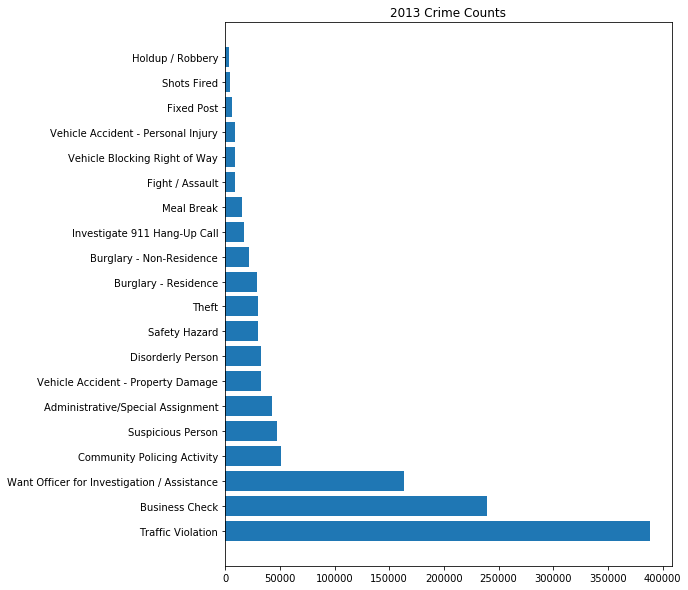

In [15]:
plt.figure(figsize = (8, 10))
plt.barh('crime', 'count', data = crime_2013.head(20))
plt.title('2013 Crime Counts')

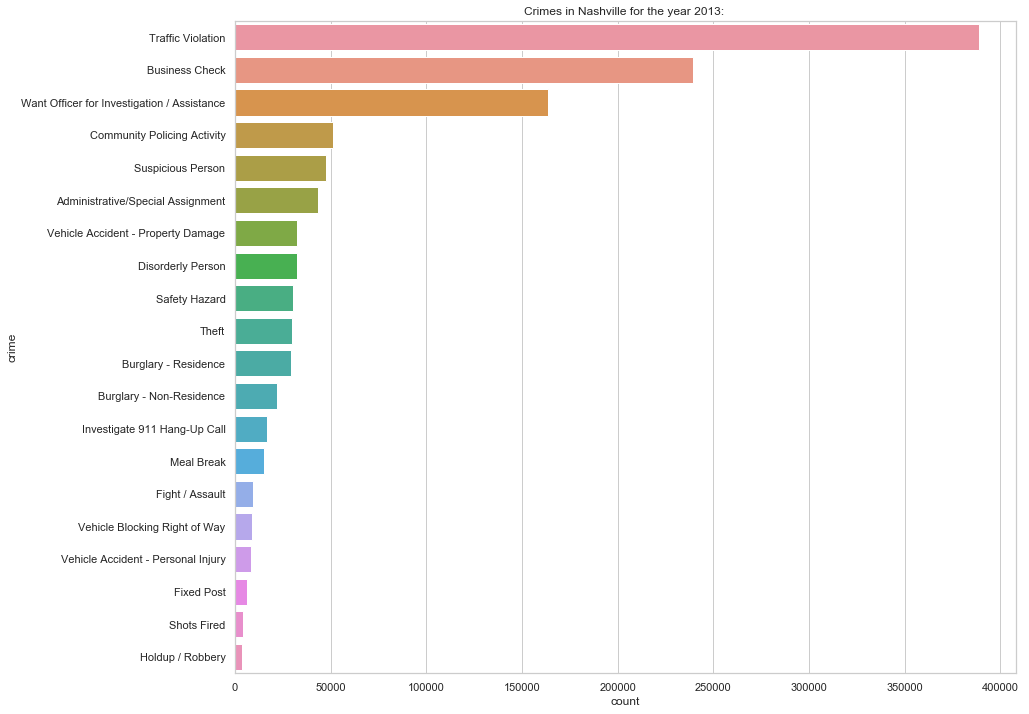

In [16]:
plt.figure(figsize = (14, 12))
sns.set(style="whitegrid")
sns.barplot('count', 'crime', data = crime_2013.head(20))
#plt.xlabel('')
#plt.ylabel('')
plt.title('Crimes in Nashville for the year 2013: ');

In [17]:
police_2018 = pd.read_csv('../data/call_2018.csv')

In [18]:
police_2018.head(2)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location,:@computed_region_wvby_4s8j
0,PD201800931293,09/21/2018 03:26:56 AM,20180805567,C,96,Business Check,NaN,NaN,11,DISREGARD / SIGNAL 9,1300.0,ANTIOCH PKE,3F24,NaN,,0.0,34.153,-92.509,"(34.153, -92.509)",NaN
1,PD201800931274,09/21/2018 03:13:24 AM,20180805550,C,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,300.0,BROADWAY,425C,C,21,4093.0,36.161,-86.777,"(36.161, -86.777)",1.0


In [19]:
police_2018.count()

Event Number                   747323
Call Received                  747323
Complaint Number               747323
Shift                          716637
Tencode                        747323
Tencode Description            747323
Tencode Suffix                 427346
Tencode Suffix Description     391955
Disposition Code               747323
Disposition Description        747185
Block                          724708
Street Name                    747321
Unit Dispatched                707528
Sector                         717120
Zone                           723767
Reporting Area (RPA)           723767
Latitude                       721933
Longitude                      721933
Mapped Location                721933
:@computed_region_wvby_4s8j    718019
dtype: int64

In [20]:
police_2018.shape

(747323, 20)

In [21]:
police_2018 = police_2018[['Event Number',
            'Call Received',
            'Complaint Number',
            'Shift',
            'Tencode',
            'Tencode Description',
            'Disposition Code',
            'Disposition Description',
            'Unit Dispatched',
            'Sector',
            'Zone',
            'Latitude',
            'Longitude']]

In [22]:
police_2018 = police_2018.rename(columns = {'Event Number': 'id', 
                            'Call Received': 'call_time', 
                            'Complaint Number': 'complaint_id',
                            'Shift': 'shift',
                            'Tencode': 'tencode',
                            'Tencode Description': 'tencode_desc',
                            'Disposition Code': 'disposition',
                            'Disposition Description': 'disposition_desc',
                            'Unit Dispatched': 'unit',
                            'Sector': 'sector',
                            'Zone': 'zone',
                            'Latitude': 'lat',
                            'Longitude': 'lng'})

In [23]:
police_2018.head(2)

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
0,PD201800931293,09/21/2018 03:26:56 AM,20180805567,C,96,Business Check,11,DISREGARD / SIGNAL 9,3F24,NaN,,34.153,-92.509
1,PD201800931274,09/21/2018 03:13:24 AM,20180805550,C,96,Business Check,15,COMMUNITY POLICING,425C,C,21,36.161,-86.777


In [24]:
sum(police_2018.unit.value_counts() > 1000)

271

In [25]:
crime_2018 = police_2018.unit.value_counts().to_frame()

In [26]:
crime_2018 = crime_2018.reset_index()

In [27]:
crime_2018.head(2)

,index,unit
0,125C,6200
1,421C,4983


In [28]:
crime_2018 = crime_2018.rename(columns = {'index': 'unit_number', 'unit': 'calls'})

In [29]:
crime_2018.head(3)

,unit_number,calls
0,125C,6200
1,421C,4983
2,117C,4084


In [30]:
tn_code_desc_2018 = police_2018.tencode_desc.value_counts()

In [31]:
tn_code_desc_2018.head()

Business Check                                 156142
Traffic Violation                              143257
Want Officer for Investigation / Assistance    126718
Administrative/Special Assignment               41765
Community Policing Activity                     34511
Name: tencode_desc, dtype: int64

In [32]:
tn_code_desc_2018 = tn_code_desc_2018.to_frame()

In [33]:
tn_code_desc_2018 = tn_code_desc_2018.reset_index()

In [34]:
tn_code_desc_2018 = tn_code_desc_2018.rename(columns = {'index': 'crimes', 'tencode_desc': 'counts'})

In [35]:
tn_code_desc_2018.head()

,crimes,counts
0,Business Check,156142
1,Traffic Violation,143257
2,Want Officer for Investigation / Assistance,126718
3,Administrative/Special Assignment,41765
4,Community Policing Activity,34511


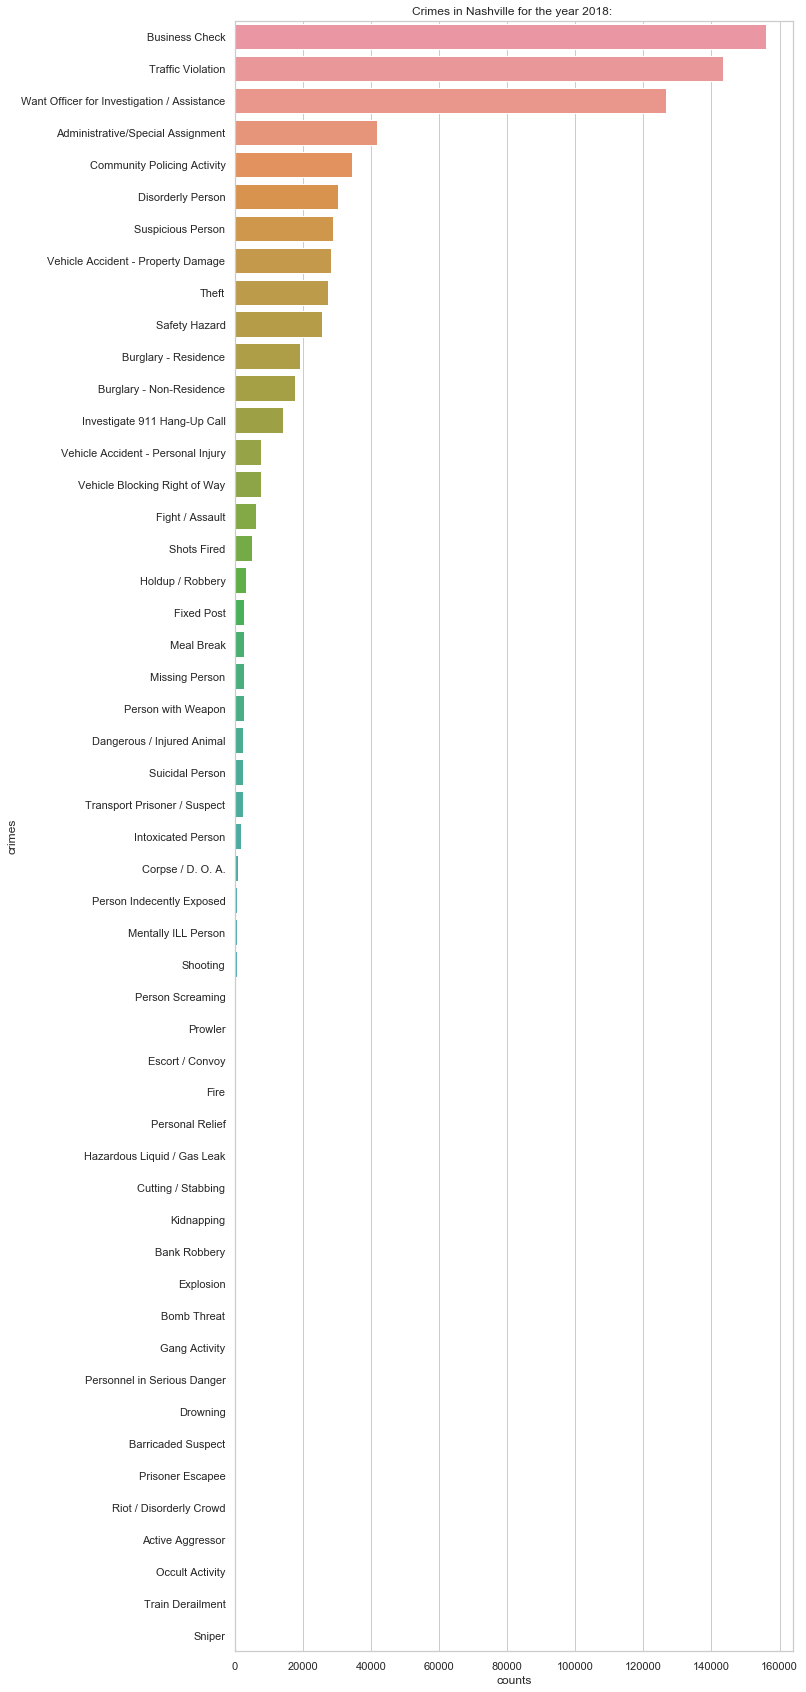

In [36]:
plt.figure(figsize = (10, 30))
sns.set(style="whitegrid")
sns.barplot('counts', 'crimes', data = tn_code_desc_2018)
#plt.xlabel('')
#plt.ylabel('')
plt.title('Crimes in Nashville for the year 2018: ');



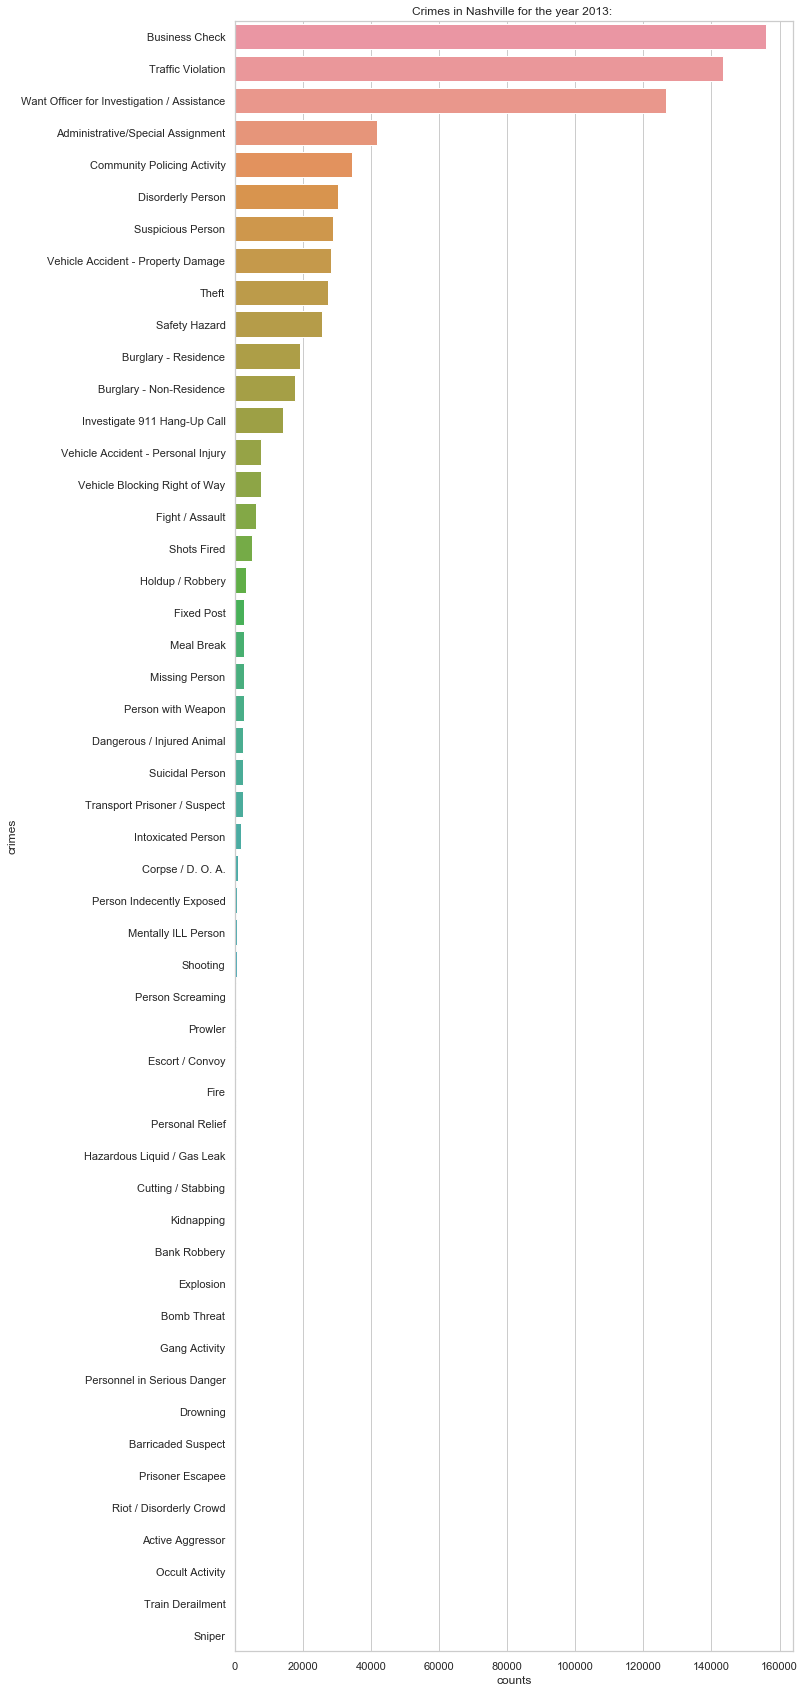

In [37]:
plt.figure(figsize = (10, 30))
sns.set(style="whitegrid")
sns.barplot('counts', 'crimes', data = tn_code_desc_2018)
#plt.xlabel('')
#plt.ylabel('')
plt.title('Crimes in Nashville for the year 2013: ');

In [38]:
police_2018.head()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
0,PD201800931293,09/21/2018 03:26:56 AM,20180805567,C,96,Business Check,11,DISREGARD / SIGNAL 9,3F24,NaN,,34.153,-92.509
1,PD201800931274,09/21/2018 03:13:24 AM,20180805550,C,96,Business Check,15,COMMUNITY POLICING,425C,C,21,36.161,-86.777
2,PD201800931267,09/21/2018 03:10:02 AM,20180805542,C,93,Traffic Violation,9,SUBJECT WARNED,113C,W,11,36.159,-86.827
3,PD201800931264,09/21/2018 03:08:21 AM,20180805537,C,43,Want Officer for Investigation / Assistance,4,ASSISTED CITIZEN,325C,S,25,36.079,-86.647
4,PD201800931263,09/21/2018 03:07:13 AM,20180805536,C,96,Business Check,12,LOCATION/BUILDING SECURE,627C,N,27,36.277,-86.819


In [39]:
police_2018_compare = pd.read_csv('../data/call_2018.csv')

In [40]:
police_2018_compare

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location,:@computed_region_wvby_4s8j
0,PD201800931293,09/21/2018 03:26:56 AM,20180805567,C,96,Business Check,NaN,NaN,11,DISREGARD / SIGNAL 9,1300.0,ANTIOCH PKE,3F24,NaN,,0.0,34.153,-92.509,"(34.153, -92.509)",NaN
1,PD201800931274,09/21/2018 03:13:24 AM,20180805550,C,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,300.0,BROADWAY,425C,C,21,4093.0,36.161,-86.777,"(36.161, -86.777)",1.0
2,PD201800931267,09/21/2018 03:10:02 AM,20180805542,C,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,0.0,CLIFTON AV & 34TH AV N,113C,W,11,4579.0,36.159,-86.827,"(36.159, -86.827)",1.0
3,PD201800931264,09/21/2018 03:08:21 AM,20180805537,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,2400.0,MURFREESBORO PKE,325C,S,25,8891.0,36.079,-86.647,"(36.079, -86.647)",1.0
4,PD201800931263,09/21/2018 03:07:13 AM,20180805536,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,7200.0,OLD HICKORY BLVD,627C,N,27,3303.0,36.277,-86.819,"(36.277, -86.819)",1.0
5,PD201800931262,09/21/2018 03:06:48 AM,20180805535,C,93,Traffic Violation,NaN,NaN,3,CITATION - TRAFFIC,1300.0,ANTIOCH PKE,3F24,S,23,8847.0,36.084,-86.689,"(36.084, -86.689)",1.0
6,PD201800931260,09/21/2018 03:05:39 AM,20180805533,C,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,3800.0,DICKERSON PKE,7F82,M,25,2039.0,36.269,-86.755,"(36.269, -86.755)",1.0
7,PD201800931259,09/21/2018 03:05:18 AM,20180805532,C,96,Business Check,NaN,NaN,4,ASSISTED CITIZEN,0.0,ALTA LOMA RD & GALLATIN PKE N,5272,M,27,1757.0,36.293,-86.702,"(36.293, -86.702)",1.0
8,PD201800931258,09/21/2018 03:04:44 AM,20180805531,C,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,3100.0,CLARKSVILLE PKE,623C,N,23,3135.0,36.194,-86.830,"(36.194, -86.83)",1.0
9,PD201800931257,09/21/2018 03:04:16 AM,20180805530,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,3000.0,CLARKSVILLE PKE,623C,N,23,3135.0,36.193,-86.829,"(36.193, -86.829)",1.0


In [41]:
police_2018_compare['Call Received'].max()

'09/21/2018 12:59:58 AM'

In [42]:
police_2013['call_time'] = pd.to_datetime(police_2013.call_time)

In [43]:
police_2013.call_time

0         2013-01-01 00:00:00
1         2013-01-01 00:01:00
2         2013-01-01 00:01:00
3         2013-01-01 00:02:00
4         2013-01-01 00:02:00
5         2013-01-01 00:02:00
6         2013-01-01 00:02:00
7         2013-01-01 00:03:00
8         2013-01-01 00:04:00
9         2013-01-01 00:04:00
10        2013-01-01 00:05:00
11        2013-01-01 00:06:00
12        2013-01-01 00:06:00
13        2013-01-01 00:07:00
14        2013-01-01 00:07:00
15        2013-01-01 00:07:00
16        2013-01-01 00:07:00
17        2013-01-01 00:08:00
18        2013-01-01 00:08:00
19        2013-01-01 00:08:00
20        2013-01-01 00:09:00
21        2013-01-01 00:09:00
22        2013-01-01 00:09:00
23        2013-01-01 00:10:00
24        2013-01-01 00:10:00
25        2013-01-01 00:10:00
26        2013-01-01 00:10:00
27        2013-01-01 00:10:00
28        2013-01-01 00:11:00
29        2013-01-01 00:11:00
                  ...        
1211680   2013-12-31 23:47:00
1211681   2013-12-31 23:48:00
1211682   

In [44]:
police_2013 = police_2013[(police_2013['call_time'] < '9-21-2013')]

In [45]:
police_2013.head()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
0,PD201300000001,2013-01-01 00:00:00,20130000003,C,15,Community Policing Activity,15,COMMUNITY POLICING,410C,C,11.0,36.162,-86.791
1,PD201300000004,2013-01-01 00:01:00,20130000005,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,333C,S,33.0,36.069,-86.716
2,PD201300000005,2013-01-01 00:01:00,20130000008,C,83,Shots Fired,6,ASSISTED OTHER UNIT,415C,C,15.0,36.176,-86.797
3,PD201300000007,2013-01-01 00:02:00,0,C,96,Business Check,12,LOCATION/BUILDING SECURE,415C,C,13.0,36.175,-86.776
4,PD201300000006,2013-01-01 00:02:00,20130000006,C,43,Want Officer for Investigation / Assistance,6,ASSISTED OTHER UNIT,2W81,E,11.0,36.168,-86.759


In [46]:
crimes_2013 = police_2013.tencode_desc

In [47]:
crimes_2013 = crimes_2013.to_frame()

In [48]:
crimes_2013.head()

,tencode_desc
0,Community Policing Activity
1,Shots Fired
2,Shots Fired
3,Business Check
4,Want Officer for Investigation / Assistance


In [47]:
subset_2013 = crimes_2013['tencode_desc'] == 'Holdup / Robbery', 'Bank Robbery', 'Burglary - Residence', 'Burglary - Non-Residence', 'Theft'
    

In [48]:
subset_2013 = subset_2013[subset_2013 == True]

In [49]:
type(subset_2013)

pandas.core.series.Series

In [50]:
subset_2013.value_counts()

False    895187
True       2897
Name: tencode_desc, dtype: int64

In [51]:
# fast method
filter_list_2013 = ['Bank Robbery', 'Burglary - Residence', 'Holdup / Robbery',
               'Burglary - Residence', 'Burglary - Non-Residence', 'Theft']
theft_2013 = police_2013[police_2013.tencode_desc.isin(filter_list_2013)]

In [52]:
#theft_2013 = theft_2013.drop(columns= ['Year'])

In [53]:
theft_2013.head()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
21,PD201300000031,2013-01-01 00:09:00,20130000057,C,70,Burglary - Residence,13,FALSE CALL,137C,W,37.0,36.056,-86.936
24,PD201300000034,2013-01-01 00:10:00,20130000030,C,71,Burglary - Non-Residence,4,ASSISTED CITIZEN,VANDY,S,21.0,36.105,-86.762
27,PD201300000038,2013-01-01 00:10:00,20130000124,C,70,Burglary - Residence,12,LOCATION/BUILDING SECURE,7F80,M,23.0,36.241,-86.735
78,PD201300000107,2013-01-01 00:30:00,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,C,25.0,36.160,-86.775
79,PD201300000108,2013-01-01 00:30:00,20130000067,C,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,311C,S,21.0,36.084,-86.748


In [54]:
year_2013 = 2013

In [55]:
theft_2013['year'] = year_2013

/Users/denisebaker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
filter_list_2018 = ['Bank Robbery', 'Burglary - Residence', 'Holdup / Robbery',
               'Burglary - Residence', 'Burglary - Non-Residence', 'Theft']
theft_2018 = police_2018[police_2018.tencode_desc.isin(filter_list_2018)]

In [57]:
theft_2018.head()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
34,PD201800931217,09/21/2018 02:40:15 AM,20180805489,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,325C,S,25,36.047,-86.657
56,PD201800931173,09/21/2018 02:12:20 AM,20180805444,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,MALL,H,15,36.205,-86.694
61,PD201800931168,09/21/2018 02:07:16 AM,20180805485,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,333C,S,33,36.013,-86.603
96,PD201800931128,09/21/2018 01:39:43 AM,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,MT,13,36.158,-86.792
115,PD201800931106,09/21/2018 01:24:58 AM,20180805369,C,50,Theft,1,M.P.D. REPORT COMPLED,615C,N,15,36.157,-86.807


In [58]:
theft_2018.rename(columns = {'Year': 'year'})

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
34,PD201800931217,09/21/2018 02:40:15 AM,20180805489,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,325C,S,25,36.047,-86.657
56,PD201800931173,09/21/2018 02:12:20 AM,20180805444,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,MALL,H,15,36.205,-86.694
61,PD201800931168,09/21/2018 02:07:16 AM,20180805485,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,333C,S,33,36.013,-86.603
96,PD201800931128,09/21/2018 01:39:43 AM,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,MT,13,36.158,-86.792
115,PD201800931106,09/21/2018 01:24:58 AM,20180805369,C,50,Theft,1,M.P.D. REPORT COMPLED,615C,N,15,36.157,-86.807
117,PD201800931104,09/21/2018 01:23:53 AM,20180805396,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,110C,W,17,36.106,-86.816
151,PD201800931061,09/21/2018 01:00:40 AM,20180805429,C,70,Burglary - Residence,12,LOCATION/BUILDING SECURE,115C,W,23,36.084,-86.958
153,PD201800931058,09/21/2018 01:00:13 AM,20180805348,C,50,Theft,1,M.P.D. REPORT COMPLED,223C,E,23,36.221,-86.766
174,PD201800931025,09/21/2018 12:47:10 AM,20180805328,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,623C,N,23,36.211,-86.838
193,PD201800930998,09/21/2018 12:38:03 AM,20180805539,C,70,Burglary - Residence,12,LOCATION/BUILDING SECURE,331C,S,31,36.033,-86.712


In [59]:
theft_2018.head()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
34,PD201800931217,09/21/2018 02:40:15 AM,20180805489,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,325C,S,25,36.047,-86.657
56,PD201800931173,09/21/2018 02:12:20 AM,20180805444,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,MALL,H,15,36.205,-86.694
61,PD201800931168,09/21/2018 02:07:16 AM,20180805485,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,333C,S,33,36.013,-86.603
96,PD201800931128,09/21/2018 01:39:43 AM,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,MT,13,36.158,-86.792
115,PD201800931106,09/21/2018 01:24:58 AM,20180805369,C,50,Theft,1,M.P.D. REPORT COMPLED,615C,N,15,36.157,-86.807


In [60]:
year_2018 = 2018

In [61]:
theft_2018['Year'] = 2018

/Users/denisebaker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
theft_2018

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng,Year
34,PD201800931217,09/21/2018 02:40:15 AM,20180805489,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,325C,S,25,36.047,-86.657,2018
56,PD201800931173,09/21/2018 02:12:20 AM,20180805444,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,MALL,H,15,36.205,-86.694,2018
61,PD201800931168,09/21/2018 02:07:16 AM,20180805485,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,333C,S,33,36.013,-86.603,2018
96,PD201800931128,09/21/2018 01:39:43 AM,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,MT,13,36.158,-86.792,2018
115,PD201800931106,09/21/2018 01:24:58 AM,20180805369,C,50,Theft,1,M.P.D. REPORT COMPLED,615C,N,15,36.157,-86.807,2018
117,PD201800931104,09/21/2018 01:23:53 AM,20180805396,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,110C,W,17,36.106,-86.816,2018
151,PD201800931061,09/21/2018 01:00:40 AM,20180805429,C,70,Burglary - Residence,12,LOCATION/BUILDING SECURE,115C,W,23,36.084,-86.958,2018
153,PD201800931058,09/21/2018 01:00:13 AM,20180805348,C,50,Theft,1,M.P.D. REPORT COMPLED,223C,E,23,36.221,-86.766,2018
174,PD201800931025,09/21/2018 12:47:10 AM,20180805328,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,623C,N,23,36.211,-86.838,2018
193,PD201800930998,09/21/2018 12:38:03 AM,20180805539,C,70,Burglary - Residence,12,LOCATION/BUILDING SECURE,331C,S,31,36.033,-86.712,2018


In [63]:
crimes = pd.concat([theft_2013, theft_2018])

/Users/denisebaker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [64]:
crimes

,Year,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
21,NaN,2013-01-01 00:09:00,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary - Residence,137C,2013.0,37
24,NaN,2013-01-01 00:10:00,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary - Non-Residence,VANDY,2013.0,21
27,NaN,2013-01-01 00:10:00,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary - Residence,7F80,2013.0,23
78,NaN,2013-01-01 00:30:00,0,11,DISREGARD / SIGNAL 9,PD201300000107,36.160,-86.775,C,C,50,Theft,NaN,2013.0,25
79,NaN,2013-01-01 00:30:00,20130000067,11,DISREGARD / SIGNAL 9,PD201300000108,36.084,-86.748,S,C,70,Burglary - Residence,311C,2013.0,21
87,NaN,2013-01-01 00:32:00,20130000154,11,DISREGARD / SIGNAL 9,PD201300000117,36.046,-86.752,S,C,70,Burglary - Residence,321C,2013.0,25
190,NaN,2013-01-01 01:10:00,20130000167,11,DISREGARD / SIGNAL 9,PD201300000239,36.155,-86.764,C,C,71,Burglary - Non-Residence,421C,2013.0,25
200,NaN,2013-01-01 01:12:00,20130000230,12,LOCATION/BUILDING SECURE,PD201300000251,36.127,-86.737,S,C,71,Burglary - Non-Residence,321C,2013.0,11
228,NaN,2013-01-01 01:23:00,0,11,DISREGARD / SIGNAL 9,PD201300000284,36.249,-86.720,M,C,71,Burglary - Non-Residence,NaN,2013.0,11
232,NaN,2013-01-01 01:24:00,20130000197,11,DISREGARD / SIGNAL 9,PD201300000289,36.249,-86.720,M,C,71,Burglary - Non-Residence,235C,2013.0,11


In [65]:
crimes.tencode_desc.value_counts()

Theft                       49357
Burglary - Residence        40242
Burglary - Non-Residence    33466
Holdup / Robbery             6015
Bank Robbery                  186
Name: tencode_desc, dtype: int64

In [66]:
crimes['tencode_desc'] = crimes.tencode_desc.map({'Holdup / Robbery': 'Robbery', 'Bank Robbery': 'Robbery',
                         'Burglary - Residence': 'Burglary', 'Burglary - Non-Residence': 'Burglary',
                         'Theft': 'Theft'})

In [67]:
crimes

,Year,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
21,NaN,2013-01-01 00:09:00,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary,137C,2013.0,37
24,NaN,2013-01-01 00:10:00,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary,VANDY,2013.0,21
27,NaN,2013-01-01 00:10:00,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary,7F80,2013.0,23
78,NaN,2013-01-01 00:30:00,0,11,DISREGARD / SIGNAL 9,PD201300000107,36.160,-86.775,C,C,50,Theft,NaN,2013.0,25
79,NaN,2013-01-01 00:30:00,20130000067,11,DISREGARD / SIGNAL 9,PD201300000108,36.084,-86.748,S,C,70,Burglary,311C,2013.0,21
87,NaN,2013-01-01 00:32:00,20130000154,11,DISREGARD / SIGNAL 9,PD201300000117,36.046,-86.752,S,C,70,Burglary,321C,2013.0,25
190,NaN,2013-01-01 01:10:00,20130000167,11,DISREGARD / SIGNAL 9,PD201300000239,36.155,-86.764,C,C,71,Burglary,421C,2013.0,25
200,NaN,2013-01-01 01:12:00,20130000230,12,LOCATION/BUILDING SECURE,PD201300000251,36.127,-86.737,S,C,71,Burglary,321C,2013.0,11
228,NaN,2013-01-01 01:23:00,0,11,DISREGARD / SIGNAL 9,PD201300000284,36.249,-86.720,M,C,71,Burglary,NaN,2013.0,11
232,NaN,2013-01-01 01:24:00,20130000197,11,DISREGARD / SIGNAL 9,PD201300000289,36.249,-86.720,M,C,71,Burglary,235C,2013.0,11


In [68]:
crimes.tencode_desc.value_counts()

Burglary    73708
Theft       49357
Robbery      6201
Name: tencode_desc, dtype: int64

In [69]:
crimes = crimes.reset_index(drop= True)

In [70]:
crimes

,Year,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
0,NaN,2013-01-01 00:09:00,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary,137C,2013.0,37
1,NaN,2013-01-01 00:10:00,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary,VANDY,2013.0,21
2,NaN,2013-01-01 00:10:00,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary,7F80,2013.0,23
3,NaN,2013-01-01 00:30:00,0,11,DISREGARD / SIGNAL 9,PD201300000107,36.160,-86.775,C,C,50,Theft,NaN,2013.0,25
4,NaN,2013-01-01 00:30:00,20130000067,11,DISREGARD / SIGNAL 9,PD201300000108,36.084,-86.748,S,C,70,Burglary,311C,2013.0,21
5,NaN,2013-01-01 00:32:00,20130000154,11,DISREGARD / SIGNAL 9,PD201300000117,36.046,-86.752,S,C,70,Burglary,321C,2013.0,25
6,NaN,2013-01-01 01:10:00,20130000167,11,DISREGARD / SIGNAL 9,PD201300000239,36.155,-86.764,C,C,71,Burglary,421C,2013.0,25
7,NaN,2013-01-01 01:12:00,20130000230,12,LOCATION/BUILDING SECURE,PD201300000251,36.127,-86.737,S,C,71,Burglary,321C,2013.0,11
8,NaN,2013-01-01 01:23:00,0,11,DISREGARD / SIGNAL 9,PD201300000284,36.249,-86.720,M,C,71,Burglary,NaN,2013.0,11
9,NaN,2013-01-01 01:24:00,20130000197,11,DISREGARD / SIGNAL 9,PD201300000289,36.249,-86.720,M,C,71,Burglary,235C,2013.0,11


In [71]:
aggregated_df = crimes.groupby(['Year','tencode_desc']).agg('count')

In [72]:
aggregated_df

call_time  complaint_id  disposition  disposition_desc  \
Year   tencode_desc                                                           
2018.0 Burglary          36720         36720        36720             36714   
       Robbery            3212          3212         3212              3212   
       Theft             27392         27392        27392             27387   

                        id    lat    lng  sector  shift  tencode   unit  year  \
Year   tencode_desc                                                             
2018.0 Burglary      36720  35184  35184   35181  35462    36720  30450     0   
       Robbery        3212   2440   2440    2440   3066     3212   3100     0   
       Theft         27392  15647  15647   15633  26820    27392  24819     0   

                      zone  
Year   tencode_desc         
2018.0 Burglary      35187  
       Robbery        2440  
       Theft         15648

In [73]:
agg_crimes = aggregated_df.reset_index()

In [74]:
agg_crimes = agg_crimes[['Year', 'tencode_desc', 'id']]

In [75]:
agg_crimes.columns = ['year', 'crime', 'count']

In [76]:
agg_crimes

,year,crime,count
0,2018.0,Burglary,36720
1,2018.0,Robbery,3212
2,2018.0,Theft,27392


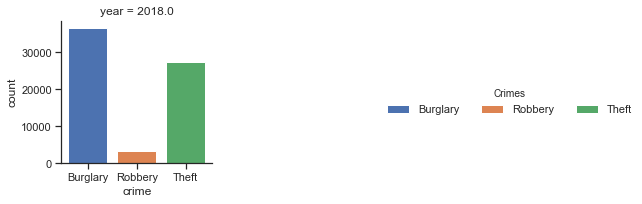

In [77]:
sns.set(style="ticks")


# Initialize a grid of plots with a column for each art type
grid = sns.FacetGrid(agg_crimes, 
                     col="year", hue="crime", aspect=1, col_wrap=2)

# Draw a plot to show the trajectory of each country
grid.map(plt.bar, "crime", "count")
grid.add_legend(ncol = 4, title = 'Crimes');

In [78]:
sector_count_2013 = crimes.loc[crimes.Year == 2013].sector.value_counts()

In [79]:
sector_count_2013.tail(1)

Series([], Name: sector, dtype: int64)

In [80]:
sector_count_2018 = crimes.loc[crimes.Year == 2018].sector.value_counts()

In [81]:
sector_count_2018.tail(1)

C    2772
Name: sector, dtype: int64

In [82]:
disregard_2013 = len(crimes.loc[(crimes.Year == 2013) & (crimes.disposition_desc == 'DISREGARD / SIGNAL 9')])

In [83]:
disregard_2013

0

In [84]:
disregard_2018 = len(crimes.loc[(crimes.Year == 2018) & (crimes.disposition_desc == 'DISREGARD / SIGNAL 9')])

In [85]:
disregard_2018

18993

In [86]:
import folium

In [87]:
Nashville = [36.1612, -86.7775]
nashville_map = folium.Map(location = Nashville, zoom_start = 12)
nashville_map

In [88]:
crimes

,Year,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
0,NaN,2013-01-01 00:09:00,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary,137C,2013.0,37
1,NaN,2013-01-01 00:10:00,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary,VANDY,2013.0,21
2,NaN,2013-01-01 00:10:00,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary,7F80,2013.0,23
3,NaN,2013-01-01 00:30:00,0,11,DISREGARD / SIGNAL 9,PD201300000107,36.160,-86.775,C,C,50,Theft,NaN,2013.0,25
4,NaN,2013-01-01 00:30:00,20130000067,11,DISREGARD / SIGNAL 9,PD201300000108,36.084,-86.748,S,C,70,Burglary,311C,2013.0,21
5,NaN,2013-01-01 00:32:00,20130000154,11,DISREGARD / SIGNAL 9,PD201300000117,36.046,-86.752,S,C,70,Burglary,321C,2013.0,25
6,NaN,2013-01-01 01:10:00,20130000167,11,DISREGARD / SIGNAL 9,PD201300000239,36.155,-86.764,C,C,71,Burglary,421C,2013.0,25
7,NaN,2013-01-01 01:12:00,20130000230,12,LOCATION/BUILDING SECURE,PD201300000251,36.127,-86.737,S,C,71,Burglary,321C,2013.0,11
8,NaN,2013-01-01 01:23:00,0,11,DISREGARD / SIGNAL 9,PD201300000284,36.249,-86.720,M,C,71,Burglary,NaN,2013.0,11
9,NaN,2013-01-01 01:24:00,20130000197,11,DISREGARD / SIGNAL 9,PD201300000289,36.249,-86.720,M,C,71,Burglary,235C,2013.0,11


In [89]:
highway_crimes = crimes.loc[crimes.tencode_desc == 'Robbery']

In [90]:
highway_crimes = highway_crimes.loc[highway_crimes.disposition_desc == 'GONE ON ARRIVAL']

In [91]:
highway_crimes = highway_crimes[(pd.notnull(highway_crimes.lat)) & (pd.notnull(highway_crimes.lng))]
highway_crimes = highway_crimes.reset_index(drop = True)
highway_crimes.head()

,Year,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
0,NaN,2013-01-07 14:39:00,20130018910,5,GONE ON ARRIVAL,PD201300025565,36.072,-86.638,S,A,53,Robbery,315A,2013.0,35
1,NaN,2013-01-18 11:36:00,20130053046,5,GONE ON ARRIVAL,PD201300072099,36.280,-86.709,M,A,53,Robbery,720A,2013.0,23
2,NaN,2013-01-19 16:00:00,20130056279,5,GONE ON ARRIVAL,PD201300076532,36.043,-86.703,S,B,53,Robbery,333B,2013.0,37
3,NaN,2013-03-10 20:57:00,20130232812,5,GONE ON ARRIVAL,PD201300269780,34.153,-92.509,N,B,53,Robbery,627B,2013.0,27
4,NaN,2013-03-11 10:20:00,20130234595,5,GONE ON ARRIVAL,PD201300271557,34.153,-92.509,N,A,53,Robbery,611A,2013.0,11


In [92]:
#for ind, row in highway_crimes.iterrows():
#    point = [row['lat'], row['lng']]
#    folium.Marker(point).add_to(nashville_map)



In [93]:
nashville_map

In [94]:
db =  ('../data/weather.db')
con = sql.connect(db)
mycursor = con.cursor()
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('Old',), ('weather2013',)]


In [95]:
conn = sql.connect('..//data//weather.db')
cur = conn.cursor


In [96]:
conn = sql.connect('..//data//weather.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_tables = (cur.fetchall())


In [97]:
weather_2013 = pd.read_sql_query("SELECT * FROM weather2013 WHERE name like '%NASHVILLE%';", conn)

In [116]:
weather_2013

,station,name,lat,lng,elevation,date,precip,avg_temp
0,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,1/1/13,0.44,
1,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,2/10/13,0.00,
2,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,2/17/13,0.00,
3,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,3/25/13,0.32,
4,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,4/19/13,1.30,
5,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,4/28/13,2.96,
6,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,5/5/13,1.53,
7,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,5/10/13,0.25,
8,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,5/12/13,0.00,
9,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,5/22/13,0.35,


In [99]:
weather_2013.shape

(2858, 8)

In [100]:
nashville_stations = weather_2013.name.value_counts().to_frame().reset_index()

In [117]:
nashville_stations#.columns = ['station', 'count']

,station,count
0,"NASHVILLE INTERNATIONAL AIRPORT, TN US",365
1,"NASHVILLE BERRY FIELD, TN US",361
2,"NASHVILLE 5.0 NE, TN US",357
3,"NASHVILLE 5.2 WSW, TN US",340
4,"NASHVILLE 6.4 E, TN US",326
5,"NASHVILLE 6.2 SSW, TN US",262
6,"NASHVILLE 7.6 WSW, TN US",227
7,"NASHVILLE 3.5 NW, TN US",225
8,"NASHVILLE 4.8 NE, TN US",158
9,"NASHVILLE 9.6 ESE, TN US",152


In [102]:
sum(nashville_stations.station.value_counts())

12

In [114]:
nashville_stations

,station,count
0,"NASHVILLE INTERNATIONAL AIRPORT, TN US",365
1,"NASHVILLE BERRY FIELD, TN US",361
2,"NASHVILLE 5.0 NE, TN US",357
3,"NASHVILLE 5.2 WSW, TN US",340
4,"NASHVILLE 6.4 E, TN US",326
5,"NASHVILLE 6.2 SSW, TN US",262
6,"NASHVILLE 7.6 WSW, TN US",227
7,"NASHVILLE 3.5 NW, TN US",225
8,"NASHVILLE 4.8 NE, TN US",158
9,"NASHVILLE 9.6 ESE, TN US",152


In [103]:
import folium

In [104]:
for ind, row in weather_2013.iterrows():
    point = [row['lat'], row['lng']]
    #icon=folium.Icon(color='darkblue', icon_color='white', icon='male')
    folium.Marker(point).add_to(nashville_map)

In [105]:
nashville_map

In [106]:
station = pd.read_sql_query("SELECT * FROM weather2013 WHERE name like 'NASHVILLE 3.5 SW, TN US';", conn)

In [107]:
station.head(1)

,station,name,lat,lng,elevation,date,precip,avg_temp
0,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/1/13,0.1,


In [108]:
#september_weather =  pd.read_sql_query("SELECT * FROM weather2013 WHERE date LIKE '9/%';", conn)

In [109]:
#september_weather

In [110]:
crimes# = crimes.rename(columns= {'Year':'year'})

,Year,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
0,NaN,2013-01-01 00:09:00,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary,137C,2013.0,37
1,NaN,2013-01-01 00:10:00,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary,VANDY,2013.0,21
2,NaN,2013-01-01 00:10:00,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary,7F80,2013.0,23
3,NaN,2013-01-01 00:30:00,0,11,DISREGARD / SIGNAL 9,PD201300000107,36.160,-86.775,C,C,50,Theft,NaN,2013.0,25
4,NaN,2013-01-01 00:30:00,20130000067,11,DISREGARD / SIGNAL 9,PD201300000108,36.084,-86.748,S,C,70,Burglary,311C,2013.0,21
5,NaN,2013-01-01 00:32:00,20130000154,11,DISREGARD / SIGNAL 9,PD201300000117,36.046,-86.752,S,C,70,Burglary,321C,2013.0,25
6,NaN,2013-01-01 01:10:00,20130000167,11,DISREGARD / SIGNAL 9,PD201300000239,36.155,-86.764,C,C,71,Burglary,421C,2013.0,25
7,NaN,2013-01-01 01:12:00,20130000230,12,LOCATION/BUILDING SECURE,PD201300000251,36.127,-86.737,S,C,71,Burglary,321C,2013.0,11
8,NaN,2013-01-01 01:23:00,0,11,DISREGARD / SIGNAL 9,PD201300000284,36.249,-86.720,M,C,71,Burglary,NaN,2013.0,11
9,NaN,2013-01-01 01:24:00,20130000197,11,DISREGARD / SIGNAL 9,PD201300000289,36.249,-86.720,M,C,71,Burglary,235C,2013.0,11


In [111]:
crimes.head()

,Year,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
0,NaN,2013-01-01 00:09:00,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary,137C,2013.0,37
1,NaN,2013-01-01 00:10:00,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary,VANDY,2013.0,21
2,NaN,2013-01-01 00:10:00,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary,7F80,2013.0,23
3,NaN,2013-01-01 00:30:00,0,11,DISREGARD / SIGNAL 9,PD201300000107,36.160,-86.775,C,C,50,Theft,NaN,2013.0,25
4,NaN,2013-01-01 00:30:00,20130000067,11,DISREGARD / SIGNAL 9,PD201300000108,36.084,-86.748,S,C,70,Burglary,311C,2013.0,21


In [112]:
september_burglaries = pd.merge(station, crimes, how= 'outer',)

In [113]:
september_burglaries.head()

,station,name,lat,lng,elevation,date,precip,avg_temp,Year,call_time,...,disposition,disposition_desc,id,sector,shift,tencode,tencode_desc,unit,year,zone
0,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/1/13,0.1,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/8/13,1.4,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/9/13,0.4,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/10/13,0.2,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/11/13,0.0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
